<a href="https://colab.research.google.com/github/winarsibidul03/psds_3.0/blob/main/Tugas_Analisis_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUGAS ANALISIS REGRESI 
**NAMA : WINARSI J. BIDUL**

**NIM : 2000015011**


##Pengklasifikasian Decision Tree di Scikit-Learn

###Import Library

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

###Menginput data "Diabetes"


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Seleksi fitur

In [3]:
features = ['Age','Pregnancies', 'Glucose', 'BloodPressure','Insulin','DiabetesPedigreeFunction','BMI']
X = df[features]
y = df['Outcome']
print(X)
print(y)

     Age  Pregnancies  Glucose  BloodPressure  Insulin  \
0     50            6      148             72        0   
1     31            1       85             66        0   
2     32            8      183             64        0   
3     21            1       89             66       94   
4     33            0      137             40      168   
..   ...          ...      ...            ...      ...   
763   63           10      101             76      180   
764   27            2      122             70        0   
765   30            5      121             72      112   
766   47            1      126             60        0   
767   23            1       93             70        0   

     DiabetesPedigreeFunction   BMI  
0                       0.627  33.6  
1                       0.351  26.6  
2                       0.672  23.3  
3                       0.167  28.1  
4                       2.288  43.1  
..                        ...   ...  
763                     0.171  32.9  

###Memisahkan data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training dan 30% test

###Membangun Decision Tree

In [5]:
#Membuat Objek Decision Tree classifer 
clf = DecisionTreeClassifier()

# Pengklasifikasi Decision Tree 
clf = clf.fit(X_train,y_train)

#Predict respon untuk test dataset
y_pred = clf.predict(X_test)

Mengevaluasi Model 

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


###Visualisasi Decision Tree

In [7]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


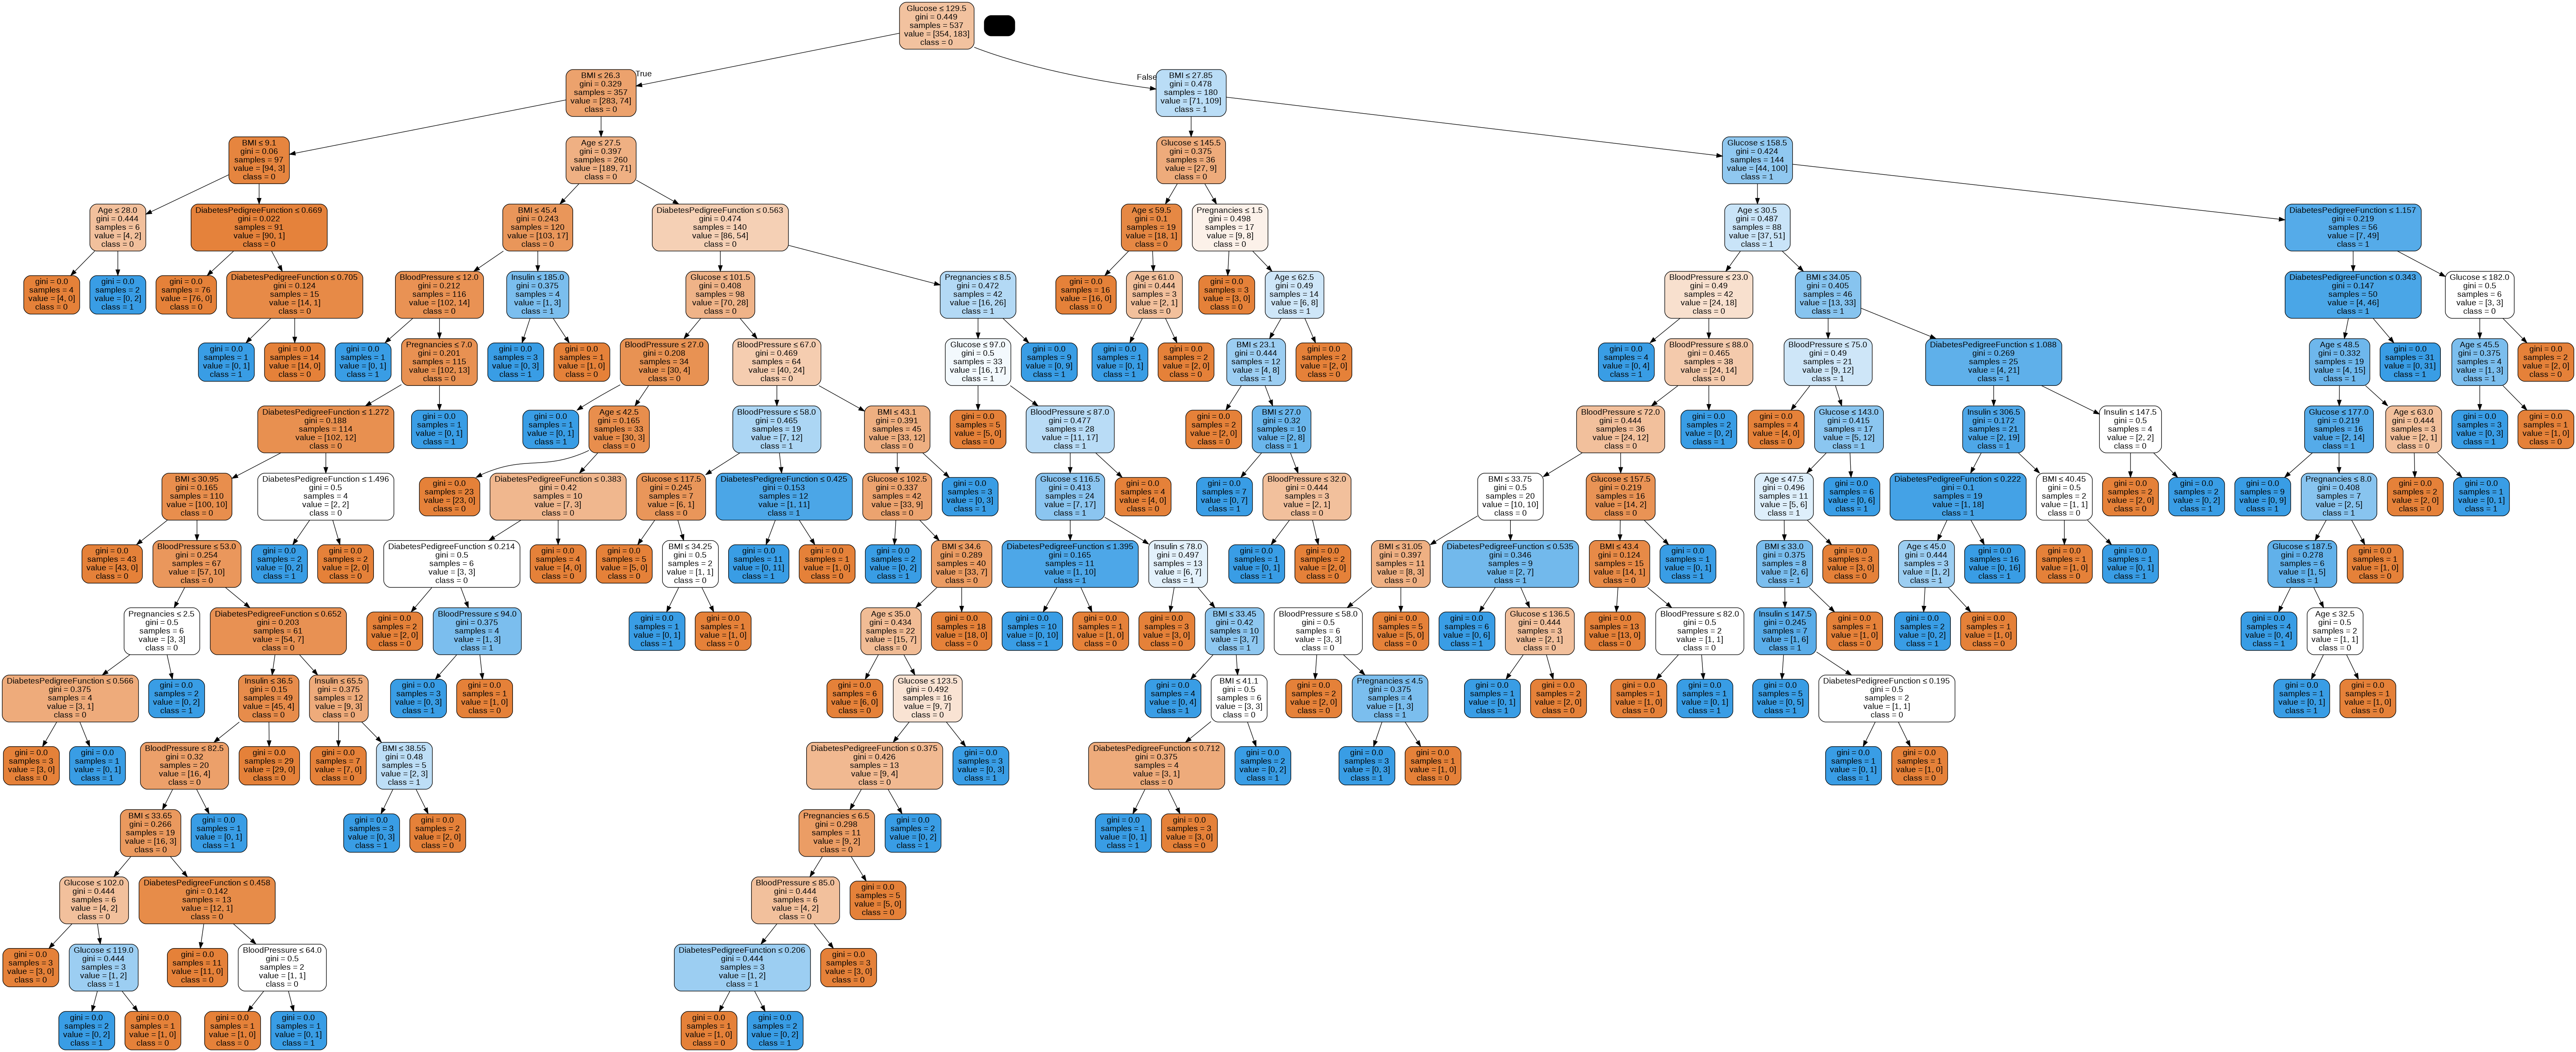

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

##Pengoptimalan Kinerja Decision Tree

In [10]:
# Membuat objek Decision Tree classifer 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Pengklasifikasi Decision Tree 
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


###Visualisasi Decision Tree

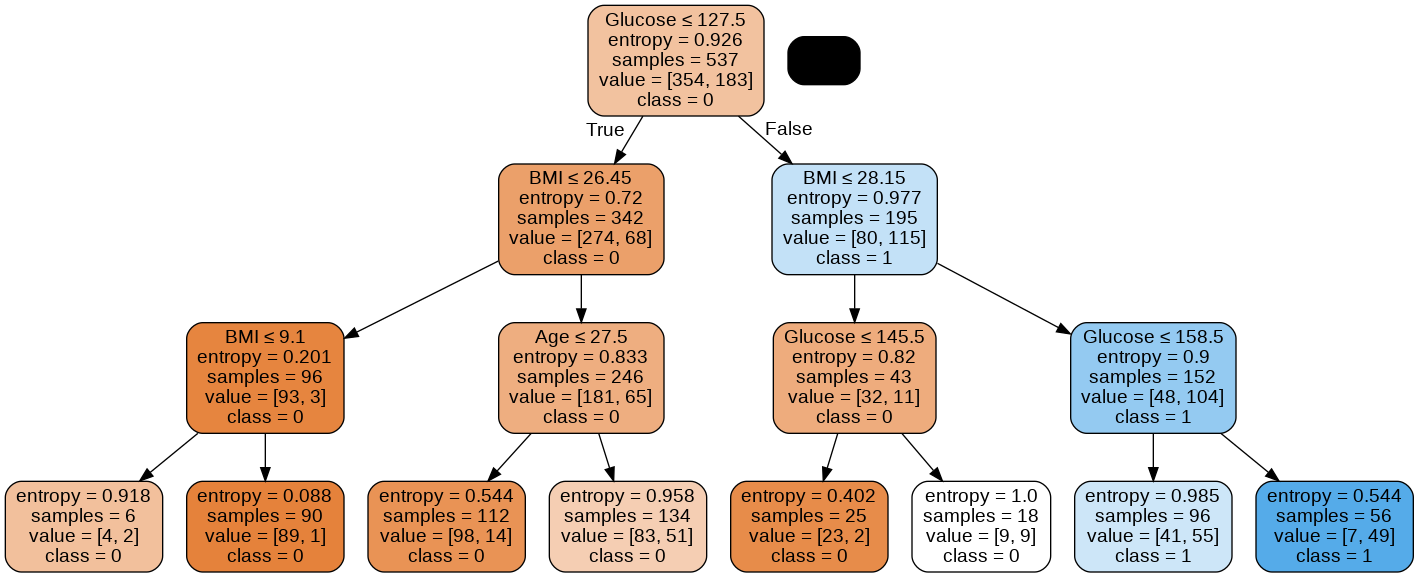

In [11]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())